# Picture processing

by: <br/>
Jelte Molenaar <br/>
Michiel van Soest

In deze notebook worden de huidige afbeeldingen aangepast en opgeslagen om meer data te creëren voor het RCNN.

In [1]:
from PIL import Image
from PIL import ImageEnhance
import glob

In [2]:
# folder path voor de output
folder_path = "/datc/shipping/processed_pictures_m/frames/"


## Aanpassingen op de originele frame

In [3]:
brightness_factor = [0.3,1.4]        # [0.4,0.5,0.6,0.7,0.8,0.9,1.1,1.2,1.3,1.4]
contrast_factor   = [0.3,1.4]        # [0.4,0.5,0.6,0.7,0.8,0.9,1.0,1.2,1.3,1.4]
sharpness_factor  = [5.0,20.0]        # [5.0, 10.0, 15.0, 20.0]
color_factor      = [0.0,10.0]             # [0.0, 3.0, 6.0, 10.0]
mirror_factor     = [1]

## Functies

In [4]:
def adjust_brightness(img_origional, frame_number, brightness_factor):
    frame_savename = folder_path + 'frame_' + str(frame_number) +'.jpg'
    enhancer_object = ImageEnhance.Brightness(img_origional)
    out = enhancer_object.enhance(brightness_factor)
    out.save(frame_savename)


In [5]:
def adjust_contrast(img_origional, frame_number, contrast_factor):
    frame_savename = folder_path + 'frame_' + str(frame_number) +'.jpg'
    enhancer_object = ImageEnhance.Contrast(img_origional)
    out = enhancer_object.enhance(contrast_factor)
    out.save(frame_savename)
    

In [6]:
def adjust_sharpness(img_origional, frame_number, sharpness_factor):
    frame_savename = folder_path + 'frame_' + str(frame_number) +'.jpg'
    enhancer_object = ImageEnhance.Sharpness(img_origional)
    out = enhancer_object.enhance(sharpness_factor)
    out.save(frame_savename)

In [7]:
def adjust_color(img_origional, frame_number, color_factor):
    frame_savename =  folder_path + 'frame_' + str(frame_number) +'.jpg'
    enhancer_object = ImageEnhance.Color(img_origional)
    out = enhancer_object.enhance(color_factor)
    out.save(frame_savename)

In [8]:
def copy_overlay(overlay_origional, frame_number, overlay_number):
    overlay_savename = "/datc/shipping/processed_pictures_m/overlays/frame_"+ str(frame_number) +'_mask.gif'
    overlay_origional.save(overlay_savename)

In [9]:
def mirror_image_origional(img_origional, frame_number, mirror_factor):
    frame_savename =  folder_path + 'frame_' + str(frame_number) +'.jpg'
    out = img_origional.transpose(Image.FLIP_LEFT_RIGHT)
    out.save(frame_savename)

In [10]:
def mirror_image_overlay(overlay_origional, frame_number, overlay_number):
    overlay_savename = "/datc/shipping/processed_pictures_m/overlays/frame_"+ str(frame_number) +'_mask.gif'
    out = overlay_origional.transpose(Image.FLIP_LEFT_RIGHT)
    out.save(overlay_savename)

### Loop - functie

In [11]:
def changeimage(location_frames,brightness_factor,contrast_factor,sharpness_factor,color_factor, frame_number, location_overlays):
    img_origional = Image.open(location_frames)
    overlay_origional = Image.open(location_overlays)
    for x in brightness_factor:
        frame_number = frame_number + 1
        adjust_brightness(img_origional, frame_number, x)
        print(frame_number, "brightness", x)
        copy_overlay(overlay_origional, frame_number, overlay_number)

    for x in contrast_factor:
        frame_number = frame_number + 1
        adjust_contrast(img_origional, frame_number, x)
        print(frame_number, "contrast" , x)
        copy_overlay(overlay_origional, frame_number, overlay_number)

    for x in sharpness_factor:
        frame_number = frame_number + 1
        adjust_sharpness(img_origional, frame_number, x)
        print(frame_number, "sharpness", x)
        copy_overlay(overlay_origional, frame_number, overlay_number)

    for x in color_factor:
        frame_number = frame_number + 1
        adjust_color(img_origional, frame_number, x)
        print(frame_number, "Color", x)
        copy_overlay(overlay_origional, frame_number, overlay_number)
    
    for x in mirror_factor:
        frame_number = frame_number + 1
        mirror_image_origional(img_origional, frame_number, x)
        print(frame_number, "mirror origional")
        mirror_image_overlay(overlay_origional, frame_number, overlay_number)
        
    return frame_number        

## opschonen output directory

In [12]:
#clean directory

import glob, os, os.path

mydir = '/datc/shipping/processed_pictures_m/frames/'

filelist = glob.glob(os.path.join(mydir, "*.jpg"))
for f in filelist:
    os.remove(f)
    
mydir = '/datc/shipping/processed_pictures_m/overlays/'

filelist = glob.glob(os.path.join(mydir, "*.gif"))
for f in filelist:
    os.remove(f)


## aanmaken frames en overlays met aanpassingen

In [13]:
#"test weghalen als het geen test meer is"
frame_number = 250
overlay_number = 9999

frames_number = glob.glob("/datc/shipping/origional_pictures_m/frames/*")
frames_number = len(frames_number)
print(frames_number, "frames in directory"  )
frames =  len(brightness_factor) + len(sharpness_factor) + len(color_factor) + len(contrast_factor) + len(mirror_factor) #aantal bewerkingen
print(frames, "adjustments on frames"  )

frame = "/datc/shipping/origional_pictures_m/frames/frame_1.jpg" #origional image
overlay = '/datc/shipping/origional_pictures_m/overlays/frame_1_mask.gif' #origional overlay

for i in range(frames_number):
    print("___________________","bewerken afbeelding",i + 1,"___________________")
    changeimage(frame,brightness_factor,contrast_factor,sharpness_factor,color_factor, frame_number, overlay)
    frame_number = frame_number + frames
    
    frame = '/datc/shipping/origional_pictures_m/frames/frame_'+str(i + 1)+'.jpg' #origional image
    overlay = '/datc/shipping/origional_pictures_m/overlays/frame_'+str(i + 1)+'_mask.gif' #origional overlay
    

250 frames in directory
9 adjustments on frames
___________________ bewerken afbeelding 1 ___________________
251 brightness 0.3
252 brightness 1.4
253 contrast 0.3
254 contrast 1.4
255 sharpness 5.0
256 sharpness 20.0
257 Color 0.0
258 Color 10.0
259 mirror origional
___________________ bewerken afbeelding 2 ___________________
260 brightness 0.3
261 brightness 1.4
262 contrast 0.3
263 contrast 1.4
264 sharpness 5.0
265 sharpness 20.0
266 Color 0.0
267 Color 10.0
268 mirror origional
___________________ bewerken afbeelding 3 ___________________
269 brightness 0.3
270 brightness 1.4
271 contrast 0.3
272 contrast 1.4
273 sharpness 5.0
274 sharpness 20.0
275 Color 0.0
276 Color 10.0
277 mirror origional
___________________ bewerken afbeelding 4 ___________________
278 brightness 0.3
279 brightness 1.4
280 contrast 0.3
281 contrast 1.4
282 sharpness 5.0
283 sharpness 20.0
284 Color 0.0
285 Color 10.0
286 mirror origional
___________________ bewerken afbeelding 5 ___________________
287 br

584 brightness 0.3
585 brightness 1.4
586 contrast 0.3
587 contrast 1.4
588 sharpness 5.0
589 sharpness 20.0
590 Color 0.0
591 Color 10.0
592 mirror origional
___________________ bewerken afbeelding 39 ___________________
593 brightness 0.3
594 brightness 1.4
595 contrast 0.3
596 contrast 1.4
597 sharpness 5.0
598 sharpness 20.0
599 Color 0.0
600 Color 10.0
601 mirror origional
___________________ bewerken afbeelding 40 ___________________
602 brightness 0.3
603 brightness 1.4
604 contrast 0.3
605 contrast 1.4
606 sharpness 5.0
607 sharpness 20.0
608 Color 0.0
609 Color 10.0
610 mirror origional
___________________ bewerken afbeelding 41 ___________________
611 brightness 0.3
612 brightness 1.4
613 contrast 0.3
614 contrast 1.4
615 sharpness 5.0
616 sharpness 20.0
617 Color 0.0
618 Color 10.0
619 mirror origional
___________________ bewerken afbeelding 42 ___________________
620 brightness 0.3
621 brightness 1.4
622 contrast 0.3
623 contrast 1.4
624 sharpness 5.0
625 sharpness 20.0
626

918 brightness 1.4
919 contrast 0.3
920 contrast 1.4
921 sharpness 5.0
922 sharpness 20.0
923 Color 0.0
924 Color 10.0
925 mirror origional
___________________ bewerken afbeelding 76 ___________________
926 brightness 0.3
927 brightness 1.4
928 contrast 0.3
929 contrast 1.4
930 sharpness 5.0
931 sharpness 20.0
932 Color 0.0
933 Color 10.0
934 mirror origional
___________________ bewerken afbeelding 77 ___________________
935 brightness 0.3
936 brightness 1.4
937 contrast 0.3
938 contrast 1.4
939 sharpness 5.0
940 sharpness 20.0
941 Color 0.0
942 Color 10.0
943 mirror origional
___________________ bewerken afbeelding 78 ___________________
944 brightness 0.3
945 brightness 1.4
946 contrast 0.3
947 contrast 1.4
948 sharpness 5.0
949 sharpness 20.0
950 Color 0.0
951 Color 10.0
952 mirror origional
___________________ bewerken afbeelding 79 ___________________
953 brightness 0.3
954 brightness 1.4
955 contrast 0.3
956 contrast 1.4
957 sharpness 5.0
958 sharpness 20.0
959 Color 0.0
960 Colo

1242 brightness 1.4
1243 contrast 0.3
1244 contrast 1.4
1245 sharpness 5.0
1246 sharpness 20.0
1247 Color 0.0
1248 Color 10.0
1249 mirror origional
___________________ bewerken afbeelding 112 ___________________
1250 brightness 0.3
1251 brightness 1.4
1252 contrast 0.3
1253 contrast 1.4
1254 sharpness 5.0
1255 sharpness 20.0
1256 Color 0.0
1257 Color 10.0
1258 mirror origional
___________________ bewerken afbeelding 113 ___________________
1259 brightness 0.3
1260 brightness 1.4
1261 contrast 0.3
1262 contrast 1.4
1263 sharpness 5.0
1264 sharpness 20.0
1265 Color 0.0
1266 Color 10.0
1267 mirror origional
___________________ bewerken afbeelding 114 ___________________
1268 brightness 0.3
1269 brightness 1.4
1270 contrast 0.3
1271 contrast 1.4
1272 sharpness 5.0
1273 sharpness 20.0
1274 Color 0.0
1275 Color 10.0
1276 mirror origional
___________________ bewerken afbeelding 115 ___________________
1277 brightness 0.3
1278 brightness 1.4
1279 contrast 0.3
1280 contrast 1.4
1281 sharpness 5

1563 Color 10.0
1564 mirror origional
___________________ bewerken afbeelding 147 ___________________
1565 brightness 0.3
1566 brightness 1.4
1567 contrast 0.3
1568 contrast 1.4
1569 sharpness 5.0
1570 sharpness 20.0
1571 Color 0.0
1572 Color 10.0
1573 mirror origional
___________________ bewerken afbeelding 148 ___________________
1574 brightness 0.3
1575 brightness 1.4
1576 contrast 0.3
1577 contrast 1.4
1578 sharpness 5.0
1579 sharpness 20.0
1580 Color 0.0
1581 Color 10.0
1582 mirror origional
___________________ bewerken afbeelding 149 ___________________
1583 brightness 0.3
1584 brightness 1.4
1585 contrast 0.3
1586 contrast 1.4
1587 sharpness 5.0
1588 sharpness 20.0
1589 Color 0.0
1590 Color 10.0
1591 mirror origional
___________________ bewerken afbeelding 150 ___________________
1592 brightness 0.3
1593 brightness 1.4
1594 contrast 0.3
1595 contrast 1.4
1596 sharpness 5.0
1597 sharpness 20.0
1598 Color 0.0
1599 Color 10.0
1600 mirror origional
___________________ bewerken afbee

1880 brightness 0.3
1881 brightness 1.4
1882 contrast 0.3
1883 contrast 1.4
1884 sharpness 5.0
1885 sharpness 20.0
1886 Color 0.0
1887 Color 10.0
1888 mirror origional
___________________ bewerken afbeelding 183 ___________________
1889 brightness 0.3
1890 brightness 1.4
1891 contrast 0.3
1892 contrast 1.4
1893 sharpness 5.0
1894 sharpness 20.0
1895 Color 0.0
1896 Color 10.0
1897 mirror origional
___________________ bewerken afbeelding 184 ___________________
1898 brightness 0.3
1899 brightness 1.4
1900 contrast 0.3
1901 contrast 1.4
1902 sharpness 5.0
1903 sharpness 20.0
1904 Color 0.0
1905 Color 10.0
1906 mirror origional
___________________ bewerken afbeelding 185 ___________________
1907 brightness 0.3
1908 brightness 1.4
1909 contrast 0.3
1910 contrast 1.4
1911 sharpness 5.0
1912 sharpness 20.0
1913 Color 0.0
1914 Color 10.0
1915 mirror origional
___________________ bewerken afbeelding 186 ___________________
1916 brightness 0.3
1917 brightness 1.4
1918 contrast 0.3
1919 contrast 

2199 sharpness 5.0
2200 sharpness 20.0
2201 Color 0.0
2202 Color 10.0
2203 mirror origional
___________________ bewerken afbeelding 218 ___________________
2204 brightness 0.3
2205 brightness 1.4
2206 contrast 0.3
2207 contrast 1.4
2208 sharpness 5.0
2209 sharpness 20.0
2210 Color 0.0
2211 Color 10.0
2212 mirror origional
___________________ bewerken afbeelding 219 ___________________
2213 brightness 0.3
2214 brightness 1.4
2215 contrast 0.3
2216 contrast 1.4
2217 sharpness 5.0
2218 sharpness 20.0
2219 Color 0.0
2220 Color 10.0
2221 mirror origional
___________________ bewerken afbeelding 220 ___________________
2222 brightness 0.3
2223 brightness 1.4
2224 contrast 0.3
2225 contrast 1.4
2226 sharpness 5.0
2227 sharpness 20.0
2228 Color 0.0
2229 Color 10.0
2230 mirror origional
___________________ bewerken afbeelding 221 ___________________
2231 brightness 0.3
2232 brightness 1.4
2233 contrast 0.3
2234 contrast 1.4
2235 sharpness 5.0
2236 sharpness 20.0
2237 Color 0.0
2238 Color 10.0
22

## Controle

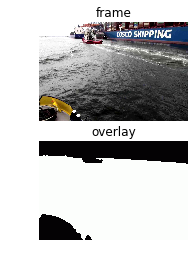

In [28]:
import matplotlib.pyplot as plt
import random


#randomly select frame number
select_frame_number = random.randint(251,2500)
#manually select frame number:
#select_frame_number = 1000

img_frame = '/datc/shipping/processed_pictures_m/frames/frame_'+ str(select_frame_number)+'.jpg'
img_overlay = '/datc/shipping/processed_pictures_m/overlays/frame_' + str(select_frame_number) + '_mask.gif'

read_img_frame = plt.imread(img_frame)
read_img_overlay = plt.imread(img_overlay)

plt.subplot(2,1,1)
plt.imshow(read_img_frame)
plt.title('frame')
plt.axis('off')

plt.subplot(2,1,2)
plt.imshow(read_img_overlay)
plt.title('overlay')
plt.axis('off')

plt.show()